## Description
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

## Importing Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV

In [2]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
print(f"The shape of dataset is {train.shape}")

The shape of dataset is (7352, 563)


In [6]:
train['subject'].value_counts()

subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64

## Data Preprocessing

#### checking for duplicates

In [7]:
print("Number of duplicates in train :",sum(train.duplicated()))
print("Number of duplicates in test  :",sum(test.duplicated()))

Number of duplicates in train : 0
Number of duplicates in test  : 0


#### checking for missing values

In [8]:
print("Number of missing values in train",train.isna().values.sum())
print("Number of missing values in test",test.isna().values.sum())

Number of missing values in train 0
Number of missing values in test 0


#### checking for class imbalance

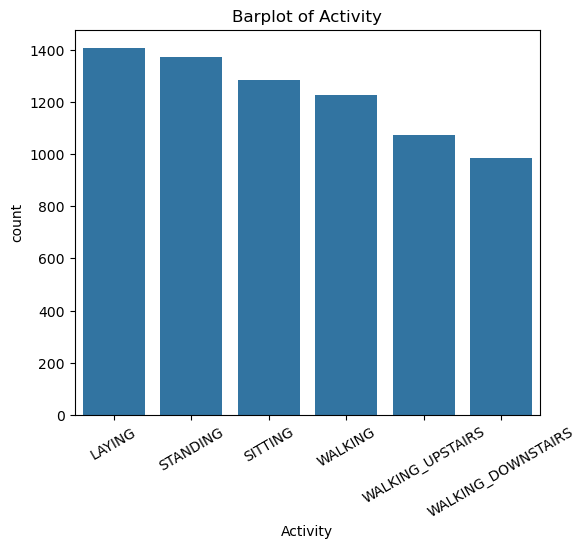

In [9]:
plt.figure(figsize=(6,5))
plt.title("Barplot of Activity")
sns.countplot(x='Activity', data=train,order=train['Activity'].value_counts().index)
plt.xticks(rotation=30)
plt.show()

There is almost same number of observations across all activities so there is no imbalance problem

## Exploratory Data Analysis

In [10]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:
features = [col.split("-")[0].split('(')[0] for col in train.columns]

In [12]:
pd.DataFrame.from_dict(Counter(features),orient="index").rename(columns={0:'Count'}).sort_values("Count",ascending=False)

,Count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


## Analysing tBodyAccMag-mean feature

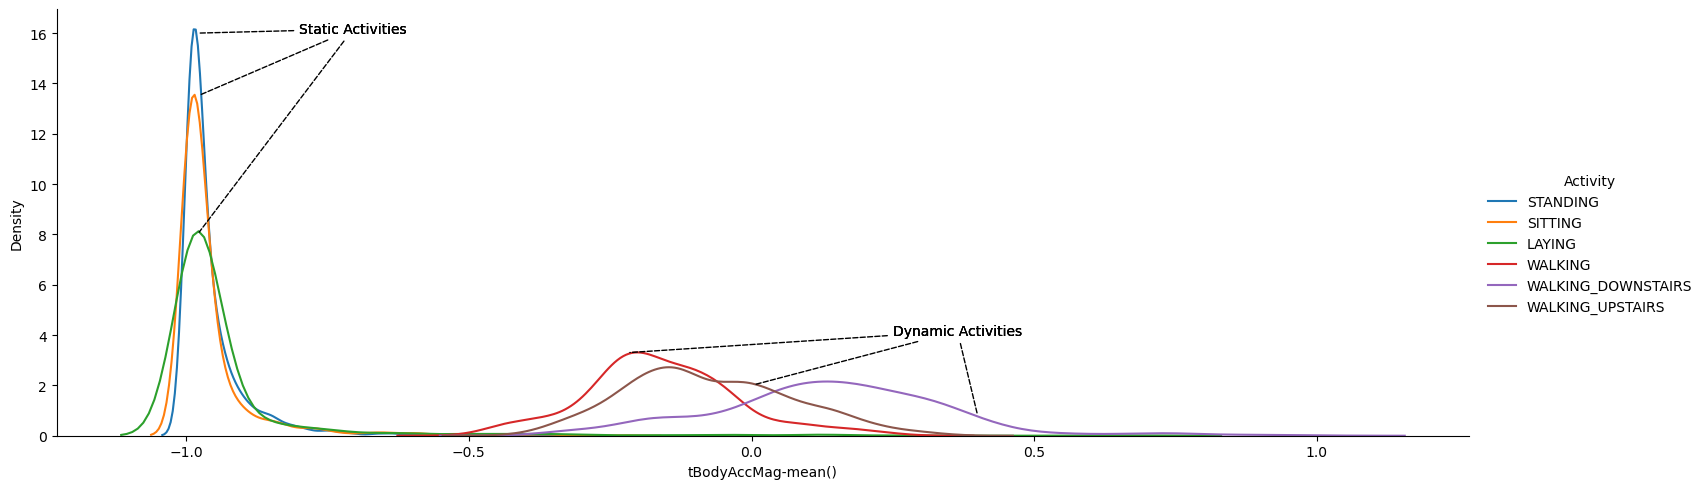

In [13]:
facetgrid = sns.FacetGrid(data = train, hue = 'Activity',height=5,aspect=3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()
plt.annotate("Static Activities" , xy=(-.98,8)    , xytext=(-.8,16) , arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities" , xy=(-.98,13.5) , xytext=(-.8,16) , arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities" , xy=(-.98,16)   , xytext=(-.8,16) , arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities" , xy=(-.22,3.3) , xytext=(.25,4), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities" , xy=(-0,2)     , xytext=(.25,4), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities" , xy=(0.4,0.8)  , xytext=(.25,4), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.show()

Using the above density plot we can easily come with a condition to seperate static activities from dynamic activities.
                
                if(tBodyAccMag-mean()<=-0.5):
                    Activity = "static"
                else:
                    Activity = "dynamic"

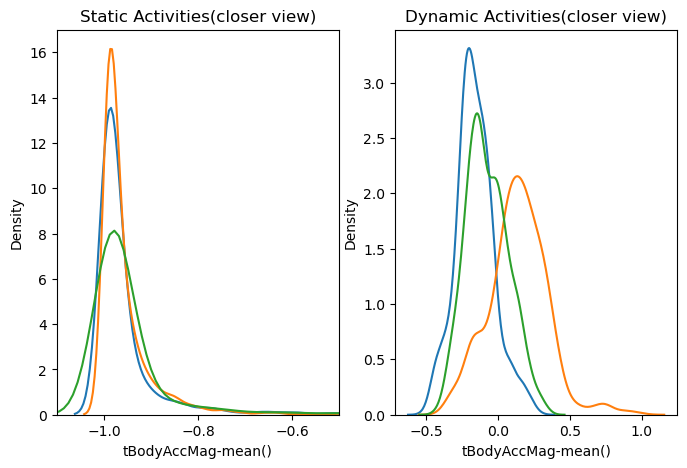

In [14]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.1, -0.5, 0, 17])

plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.show()

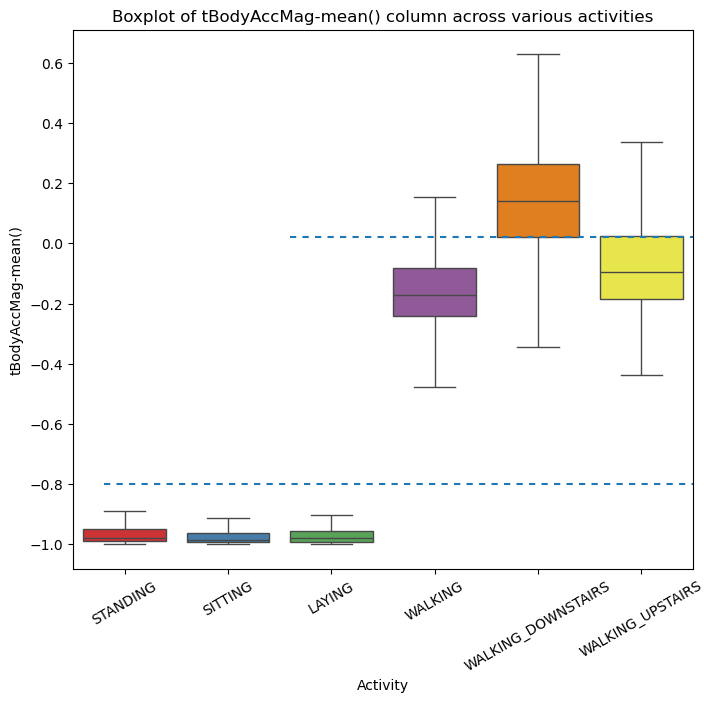

In [48]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Activity',y='tBodyAccMag-mean()',data=train,showfliers=False,palette='Set1')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y= -0.8, xmin=0.05, dashes=(3,3))
plt.axhline(y= 0.02, xmin = 0.35, dashes=(3,3))
plt.xticks(rotation=30)
plt.show()

Using boxplot again we can come with conditions to seperate static activities from dynamic activities.

    if(tBodyAccMag-mean()<=-0.8):
        Activity = "static"
    if(tBodyAccMag-mean()>=-0.6):
        Activity = "dynamic"
Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

    if(tBodyAccMag-mean()>0.02):
        Activity = "WALKING_DOWNSTAIRS"
    else:
        Activity = "others"
But still, some part of the WALKING_DOWNSTAIRS observations are below 0.02, which indicates they are misclassified.

## Analysing Angle between X-axis and gravityMean feature

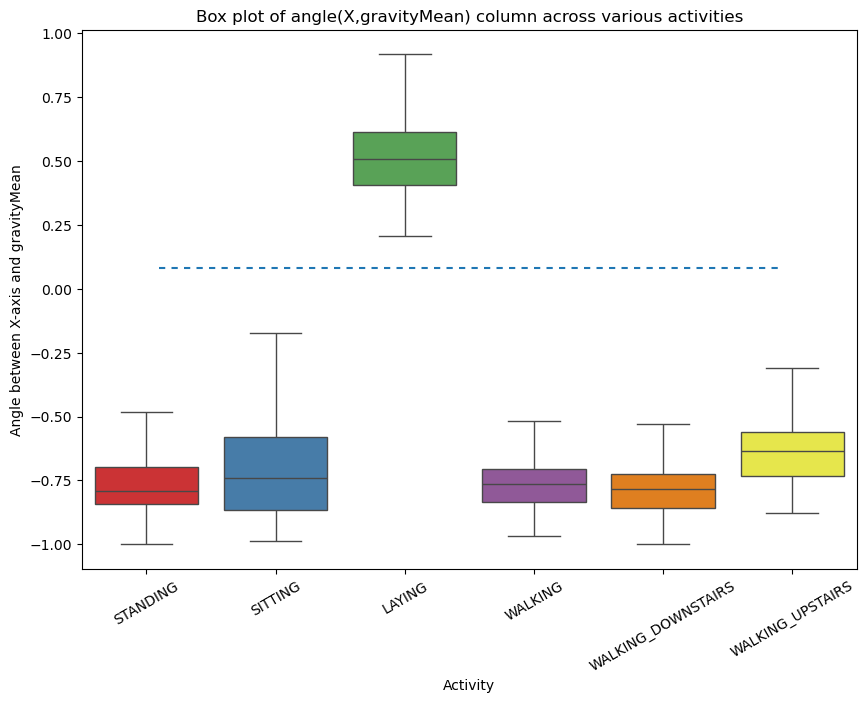

In [49]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False,palette='Set1')
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.

    if(angle(X,gravityMean)>0.01):
        Activity = "LAYING"
    else:
        Activity = "others"

## Analysing Angle between Y-axis and gravityMean feature

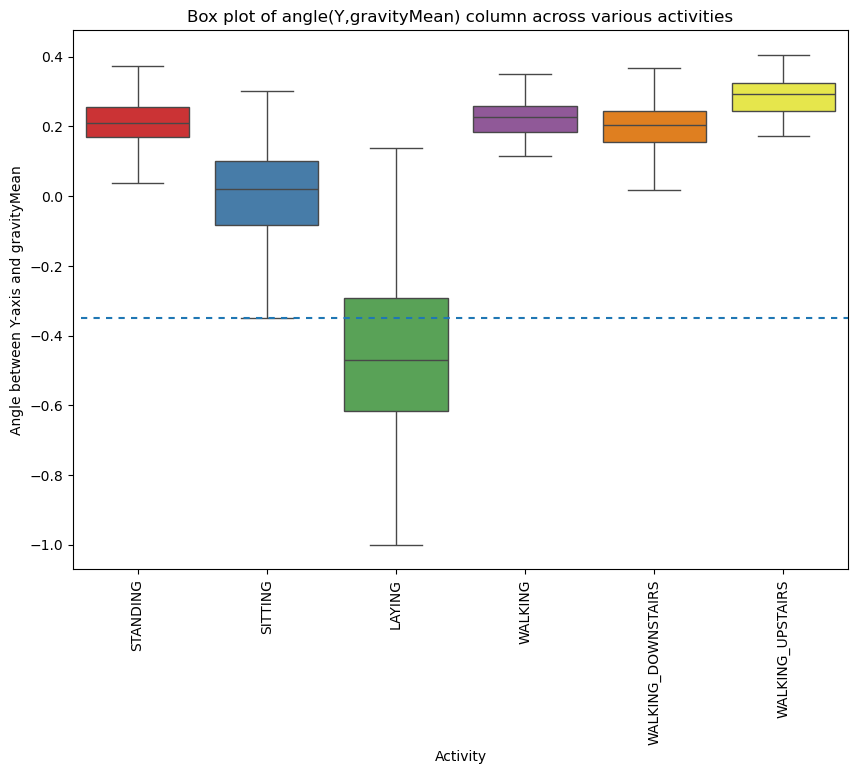

In [50]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False,palette='Set1')
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))
plt.show()

Similarly, using Angle between Y-axis and gravityMean we can seperate LAYING from other activities but again it leads to some misclassification error.

## Visualizing data using PCA

In [18]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)

In [19]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

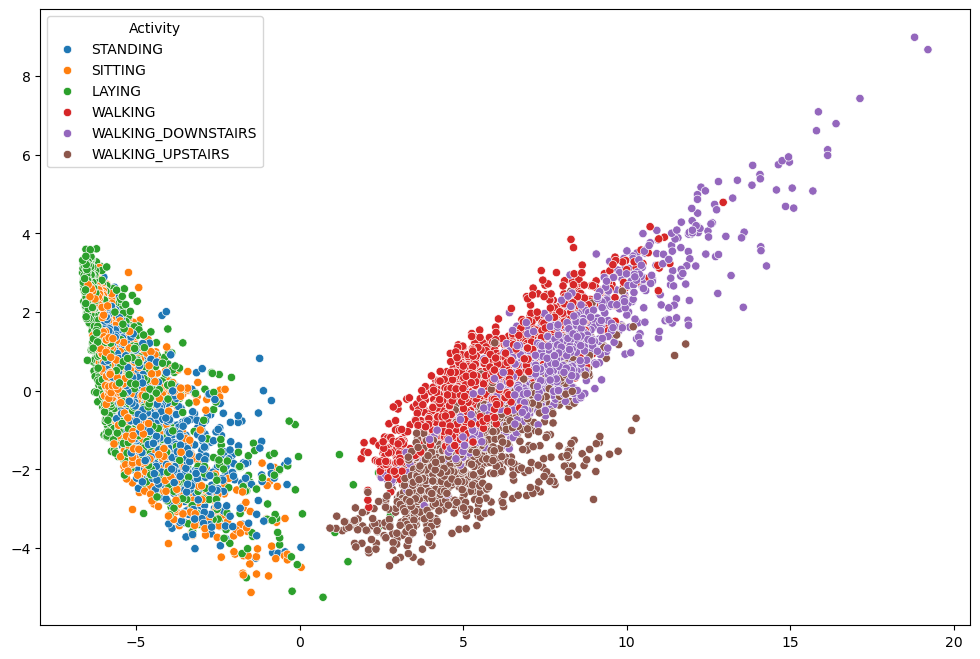

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Activity'])
plt.show()

## Visualizing data using t-SNE

In [21]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [22]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

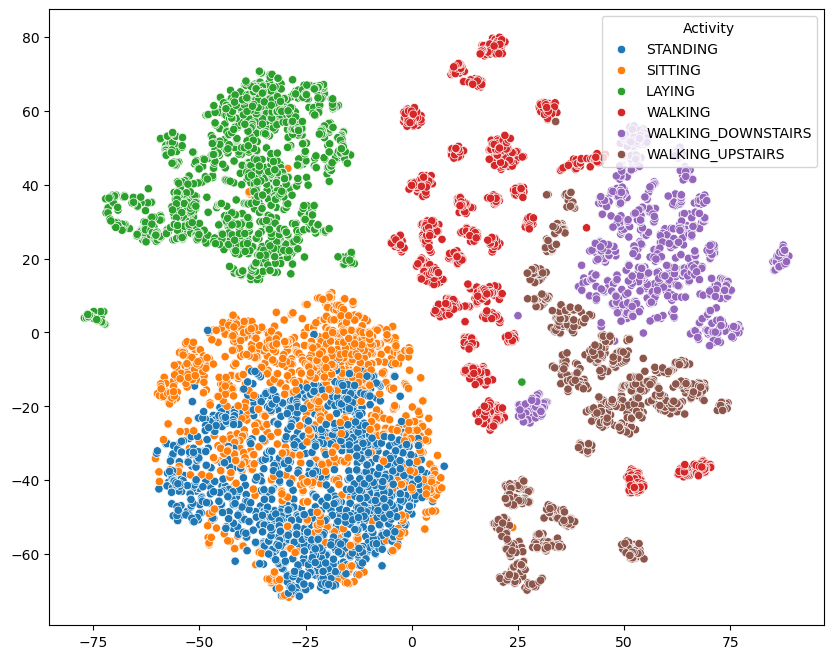

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = train['Activity'])
plt.show()

# ML MODELS

### Getting training and test data ready

In [24]:
X_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis = 1)
y_test = test.Activity

In [25]:
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7352, 561)
Test data size :  (999, 561)


### Logistic regression model with Hyperparameter tuning and cross validation

In [26]:
parameters = {'max_iter': [100, 200, 500],'solver':['lbfg', 'liblinear','saga'],'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [27]:
lr_classifier = LogisticRegression()
lr_classifier_rd = RandomizedSearchCV(lr_classifier, param_distributions= parameters, cv = 5, random_state=42)

In [28]:
lr_classifier_rd.fit(X_train, y_train)
y_pred_lr = lr_classifier_rd.predict(X_test)

In [29]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_lr)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.953953953953954


In [31]:
cm = confusion_matrix(y_test.values,y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  3, 143,  21,   0,   0,   3],
       [  0,   7, 170,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   1,   0,  10,   0, 138]], dtype=int64)

In [41]:
labels = np.unique(y_pred_lr)

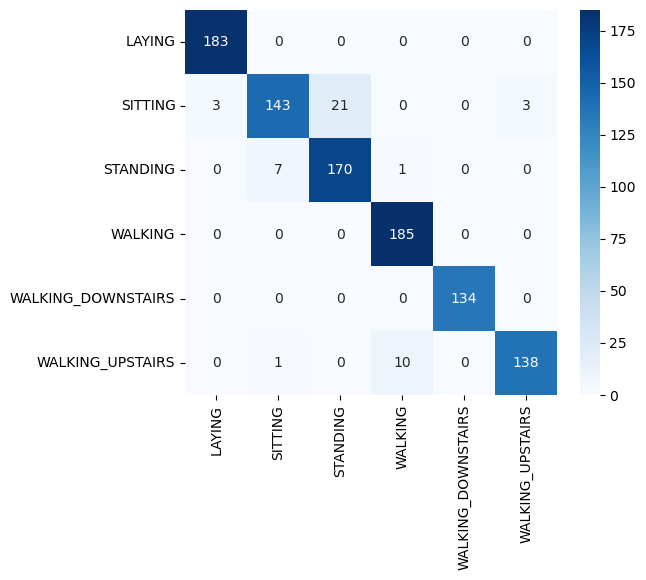

In [45]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.show()

In [52]:
print("Best estimator : ", lr_classifier_rd.best_estimator_)
print("Best set of parameters : ", lr_classifier_rd.best_params_)

Best estimator :  LogisticRegression(C=100, max_iter=200, solver='liblinear')
Best set of parameters :  {'solver': 'liblinear', 'max_iter': 200, 'C': 100}


## Kernel SVM model with Hyperparameter tuning and cross validation

In [53]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv = 3, random_state=42)
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [54]:
y_pred = svm_rs.predict(X_test)

In [55]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.965965965965966


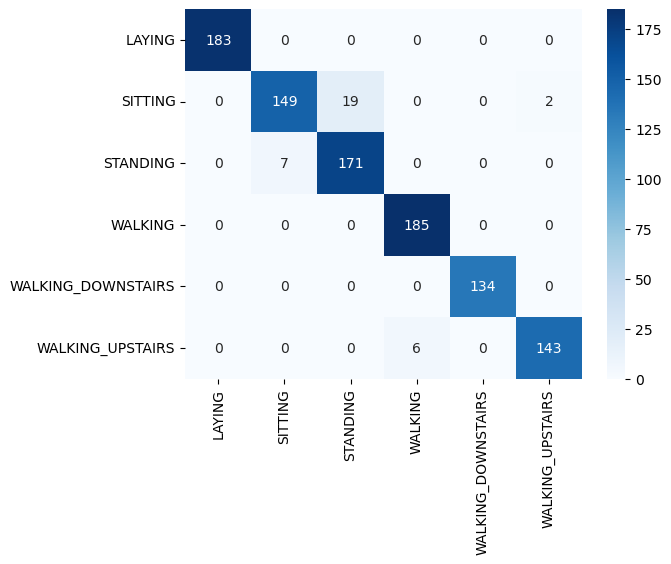

In [57]:
cm = confusion_matrix(y_test.values,y_pred)
sns.heatmap(data = cm , annot = True , fmt='d',cmap='Blues',xticklabels=np.unique(y_pred),yticklabels=np.unique(y_pred))
plt.show()

In [59]:
print("Best estimator : ", svm_rs.best_estimator_)
print("Best set of parameters : ", svm_rs.best_params_)

Best estimator :  SVC(C=50)
Best set of parameters :  {'kernel': 'rbf', 'C': 50}


## Decision tree model with Hyperparameter tuning and cross validation

In [60]:
parameters = {'max_depth': np.arange(2, 10, 2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [61]:
y_pred = dt_classifier_rs.predict(X_test)

In [62]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8538538538538538


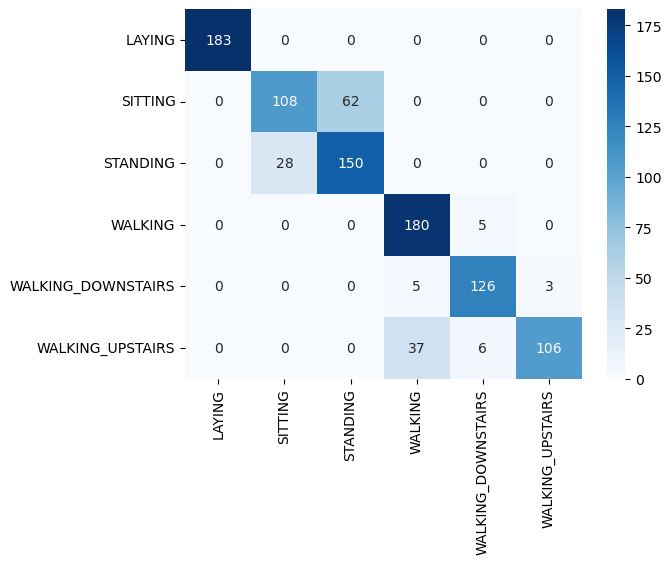

In [66]:
cm = confusion_matrix(y_test.values,y_pred)
sns.heatmap(cm, annot=True, fmt="d" , cmap="Blues", xticklabels=np.unique(y_pred) , yticklabels=np.unique(y_pred))
plt.show()

In [67]:
print("Best estimator : ", dt_classifier_rs.best_estimator_)
print("Best set of parameters : ", dt_classifier_rs.best_params_)

Best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}


## Random forest model with Hyperparameter tuning and cross validation

In [68]:
parameters = {'n_estimators': [100, 200, 300],'max_depth': [4, 5, 6, 7, 8],}

rf = RandomForestClassifier()
rf_rs = RandomizedSearchCV(rf, param_distributions=parameters , random_state=42 ,cv = 5)
rf_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 5, 6, 7, 8],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [69]:
y_pred = rf_rs.predict(X_test)

In [70]:
rf_acc = accuracy_score(y_test,y_pred)
print("Accuracy using Random Forest",rf_acc)

Accuracy using Random Forest 0.8968968968968969


In [71]:
cm = confusion_matrix(y_test.values,y_pred)

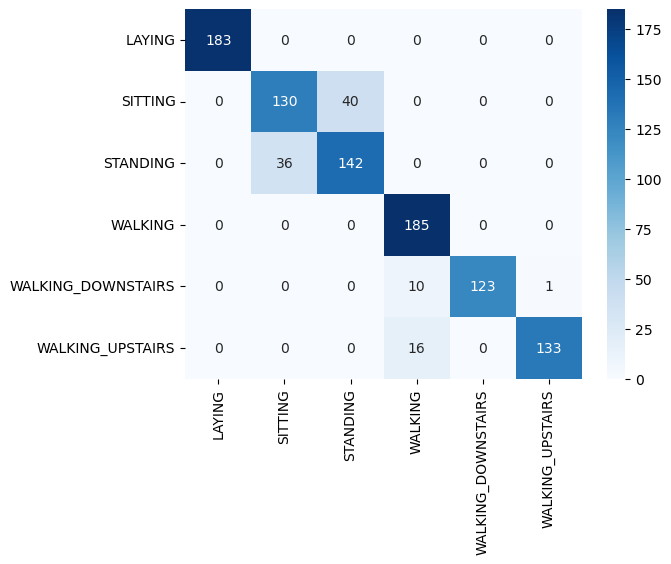

In [73]:
sns.heatmap(cm,fmt="d",annot=True,cmap='Blues',xticklabels=np.unique(y_pred),yticklabels=np.unique(y_pred))
plt.show()

As we getting the maximum accuracy with Support Vector Machine Model hence its the best one for Activity Recognition i.e  96%

In [117]:
data = np.array(X_test.loc[890]).reshape(1, -1)

In [119]:
pred = svm_rs.predict(data)

In [120]:
print("Predictions for new data:", pred)

Predictions for new data: ['WALKING_UPSTAIRS']
